a.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

data = pd.read_json("cloth_final_data.json", lines=True)
data.head()

,item_id,category,size,quality,user_name,length,fit,cup size,user_id,waist,hips,bra size,bust,height,shoe size,shoe width,review_summary,review_text
0,123373,new,21,5.0,alexmeyer626,just right,fit,dd/e,875643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,123373,new,7,5.0,Emily,just right,small,d,991571,29.0,38.0,34.0,36,5ft 6in,NaN,NaN,NaN,NaN
2,123373,new,13,3.0,sydneybraden2001,just right,small,b,587883,31.0,30.0,36.0,NaN,5ft 2in,NaN,NaN,NaN,NaN
3,123373,new,7,2.0,Ugggh,slightly long,small,b,395665,30.0,NaN,32.0,NaN,5ft 7in,9.0,NaN,NaN,NaN
4,123373,new,18,5.0,dberrones1,slightly long,small,b,944840,NaN,NaN,36.0,NaN,5ft 2in,NaN,NaN,NaN,NaN


b.

In [2]:
data.describe()

,item_id,size,quality,user_id,waist,hips,bra size,shoe size
count,82790.000000,82790.000000,82722.000000,82790.000000,2882.000000,56064.000000,76772.000000,27915.000000
mean,469325.229170,12.661602,3.949058,498849.564718,31.319223,40.358501,35.972125,8.145818
std,213999.803314,8.271952,0.992783,286356.969459,5.302849,5.827166,3.224907,1.336109
min,123373.000000,0.000000,1.000000,6.000000,20.000000,30.000000,28.000000,5.000000
25%,314980.000000,8.000000,3.000000,252897.750000,28.000000,36.000000,34.000000,7.000000
50%,454030.000000,12.000000,4.000000,497913.500000,30.000000,39.000000,36.000000,8.000000
75%,658440.000000,15.000000,5.000000,744745.250000,34.000000,43.000000,38.000000,9.000000
max,807722.000000,38.000000,5.000000,999972.000000,50.000000,60.000000,48.000000,38.000000


c.

In [3]:
missing_values = pd.DataFrame({'missing value count': data.isnull().sum()})
missing_values

,missing value count
item_id,0
category,0
size,0
quality,68
user_name,0
length,35
fit,0
cup size,6255
user_id,0
waist,79908


In [4]:
# dropping length tuples
missing_tuples = data[data.length.isnull()].index
data.drop(missing_tuples, axis = 0, inplace=True)

In [5]:
# dropping quality tuples
missing_tuples = data[data.quality.isnull()].index
data.drop(missing_tuples, axis = 0, inplace=True)

In [6]:
data.review_summary = data.review_summary.fillna('Unknown')
data.review_text = data.review_text.fillna('Unknown')

In [7]:
data.drop(['waist', 'bust'], axis=1, inplace=True)

In [8]:
# dropping heigth tuples
missing_tuples = data[data.height.isnull()].index
data.drop(missing_tuples, axis = 0, inplace=True)

In [9]:
data.hips = data.hips.fillna(-5)
quantiles = [-10,0,31,37,40,44,75]
categories = ['Unknown','XS','S','M', 'L','XL']
data.hips = pd.cut(data.hips, quantiles, labels=categories)

In [10]:
data['cup size'].fillna('Unknown', inplace=True)
data['cup size'] = data['cup size'].astype('category').cat.as_ordered()

In [11]:
data['bra size'].fillna((data['bra size'].mean()), inplace=True)

In [12]:
from pandas.api.types import CategoricalDtype

shoe_widths_categories = CategoricalDtype(categories=['Unknown','narrow','average','wide'], ordered=True)
data['shoe width'] = data['shoe width'].fillna('Unknown')
data['shoe width'] = data['shoe width'].astype(shoe_widths_categories)

data['shoe size'] = data['shoe size'].fillna('Unknown')
data['shoe size'] = data['shoe size'].astype('category').cat.as_ordered()

Data cleaning:

In [13]:
data.category = data.category.astype('category')

In [14]:
data[data['shoe size'] == 38]

,item_id,category,size,quality,user_name,length,fit,cup size,user_id,hips,bra size,height,shoe size,shoe width,review_summary,review_text
37313,416942,new,12,5.0,Catslittle,just right,fit,d,237498,XL,36.0,5ft 5in,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


In [15]:
data.at[37313,'shoe size'] = None

In [16]:
data.fit = data.fit.astype('category')

In [17]:
def parse_height(height):
    feet_inches = height.replace('ft','').replace('in','').split(" ")
    if len(feet_inches) == 2:
        return inches_to_centimeters(12 * int(feet_inches[0]) + float(feet_inches[1]))
    return inches_to_centimeters(12 * int(feet_inches[0]))

def inches_to_centimeters(inches):
    return 2.54 * inches

data.height = data.height.apply(parse_height)

In [18]:
data.quality = data.quality.astype('category').cat.as_ordered()

In [19]:
data.drop(['user_name'], axis=1, inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81594 entries, 1 to 82789
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   item_id         81594 non-null  int64   
 1   category        81594 non-null  category
 2   size            81594 non-null  int64   
 3   quality         81594 non-null  category
 4   length          81594 non-null  object  
 5   fit             81594 non-null  category
 6   cup size        81594 non-null  category
 7   user_id         81594 non-null  int64   
 8   hips            81594 non-null  category
 9   bra size        81594 non-null  float64 
 10  height          81594 non-null  float64 
 11  shoe size       81593 non-null  category
 12  shoe width      81594 non-null  category
 13  review_summary  81594 non-null  object  
 14  review_text     81594 non-null  object  
dtypes: category(7), float64(2), int64(3), object(3)
memory usage: 8.2+ MB


d.

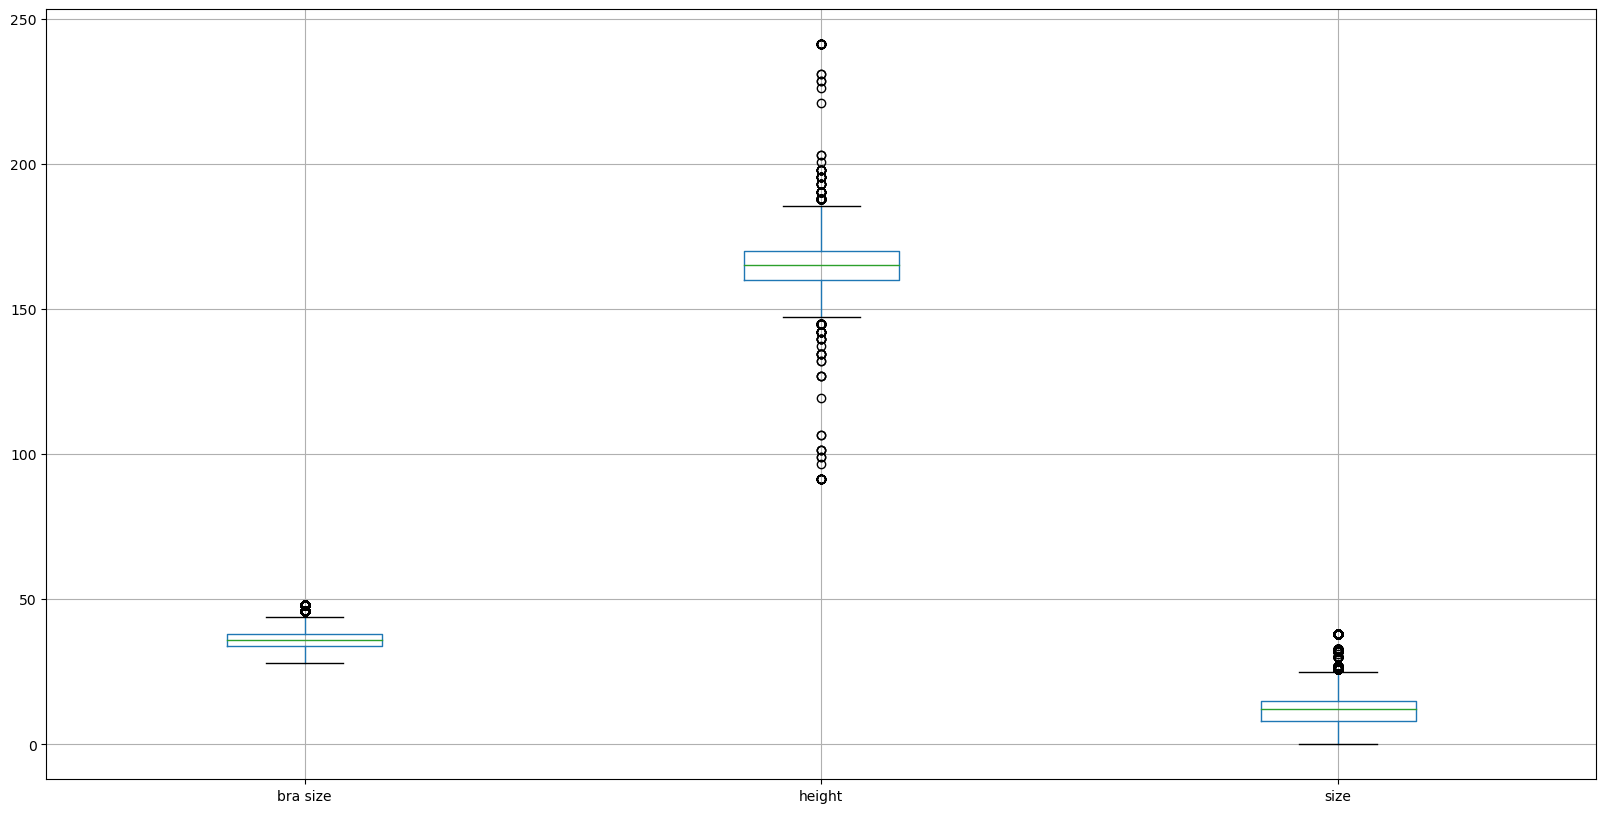

In [21]:
plt.figure(figsize=(20,10))
numerical_variables = ['bra size','height','size']
data[numerical_variables].boxplot()
plt.show()

e.

<AxesSubplot:title={'center':'Distribution of cup size'}>

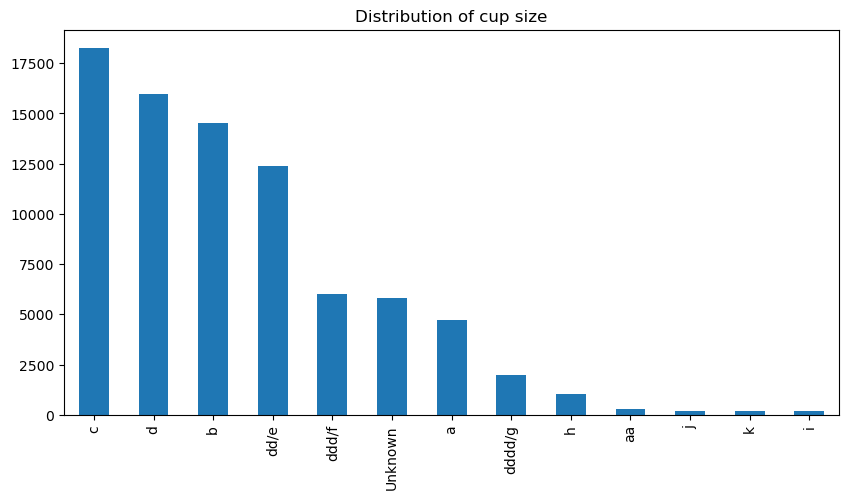

In [22]:
data['cup size'].value_counts().plot(kind='bar',figsize=(10, 5), fontsize = 10, title = "Distribution of cup size")

<AxesSubplot:title={'center':'Distribution of fit'}>

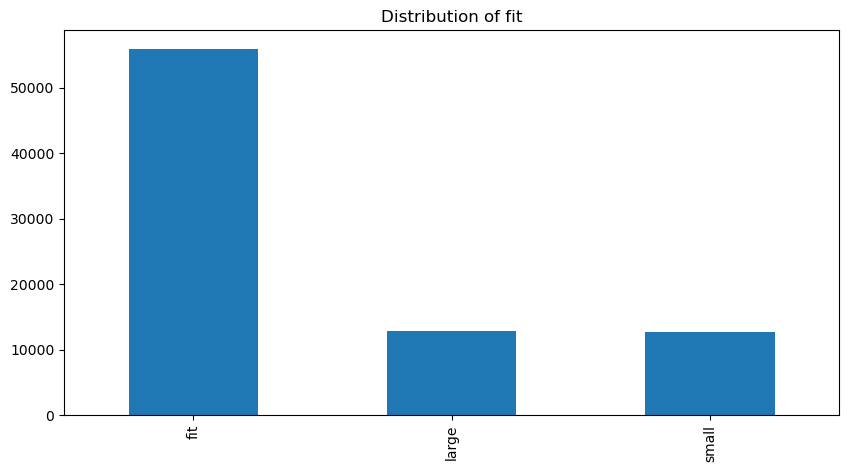

In [23]:
data.fit.value_counts().plot(kind='bar',figsize=(10, 5), fontsize = 10, title = "Distribution of fit")

<AxesSubplot:title={'center':'Distribution of quality'}>

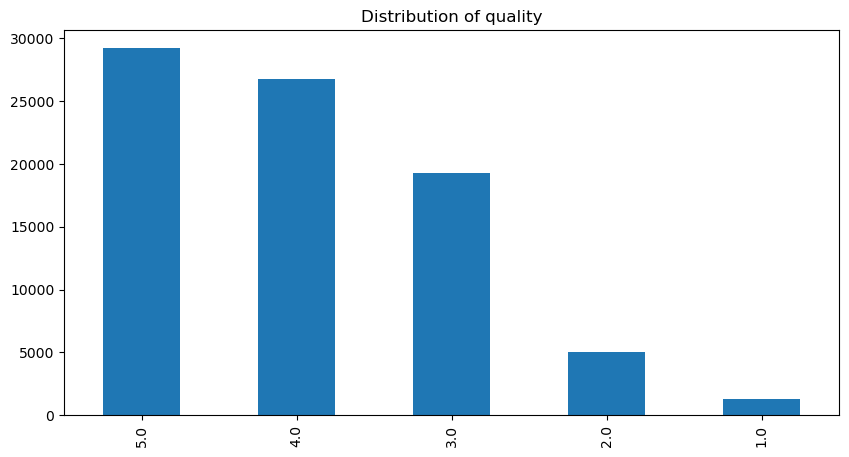

In [24]:
data.quality.value_counts().plot(kind='bar',figsize=(10, 5), fontsize = 10, title = "Distribution of quality")

f.

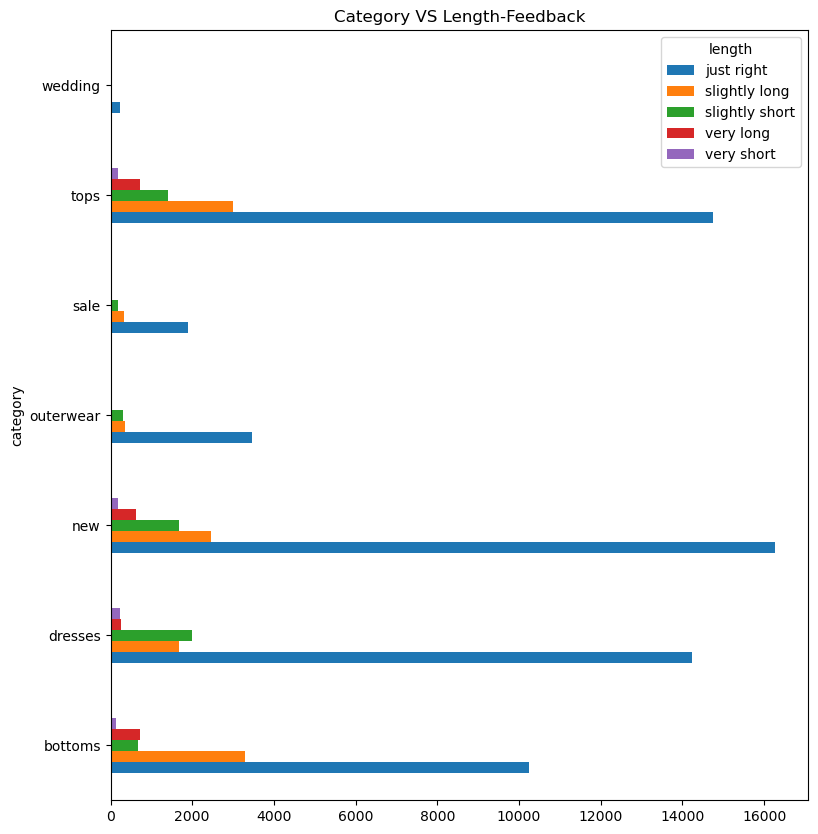

In [25]:
categories = data.groupby('category')
categories_length = categories['length'].value_counts()
categories_length = categories_length.unstack()
categories_length.plot.barh(figsize=(9, 10), fontsize = 10, title = "Category VS Length-Feedback")
fig = plt.gcf()